In [68]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import random
import WranglerFunctions as wf

from datetime import datetime
from datetime import timedelta

# Finacial Datasets: BCOMIN Index

BCOMIN Index : Bloomberg Industrial Metals Subindex.

"This index is composed of futures contracts on aluminum, copper, nickel and zinc. It reflects the return of underlying commodity futures price movements only. It is quoted in USD."

Source : https://www.bloomberg.com/quote/BCOMIN:IND

Steps according to the CRISP-DM process:

### 1) Business understanding: 
#### What does the business need?
Insight into the factors that drive the earnings of the companies in the FTSE 350 Metal and Mining.

### 2) Understanding the data:
#### What is the data?

  - PX_OPEN: Daily opening price
  - PX_HIGH: Daily high 
  - PX_LOW:  Daily low 
  - PX_LAST: Daily closing price
  
  MORE TO DO

### 3) Data Preparation

In [4]:
raw_data = pd.read_csv('BCOMIN.csv', index_col=False)
raw_data

,Unnamed: 0,BCOMIN Index,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,#NAME?,#NAME?,#NAME?,#NAME?
1,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
2,#NAME?,81.31,81.31,81.307,81.3074
3,04/01/2000,80.36,80.65,79.94,80.1822
4,05/01/2000,80.18,80.86,79.46,80.7709
...,...,...,...,...,...
5544,25/01/2022,179.4457,180.8969,178.2188,180.5218
5545,26/01/2022,180.8248,183.0417,180.6327,182.4112
5546,27/01/2022,180.3818,182.4448,179.5786,181.029
5547,28/01/2022,181.613,181.8342,178.7289,178.913


In [104]:
clean_data = raw_data.drop(labels=0)

# Dates should be used to index the dataset
clean_data.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
#clean_data.set_index('Dates', inplace=True)

#clean_data = clean_data.drop(labels='Dates')
clean_data.rename(columns={'BCOMIN Index' : 'PX_OPEN', 
                           'Unnamed: 2': 'PX_HIGH', 
                           'Unnamed: 3':'PX_LOW', 
                           'Unnamed: 4' :'PX_LAST'}, inplace=True)
clean_data = clean_data.iloc[2: , :] #Remove first 2 error lines
clean_data.reset_index(drop=True, inplace=True)
for i in range(len(clean_data)):
    clean_data["Dates"][i] = datetime.strptime(clean_data["Dates"][i], "%d/%m/%Y") #Puts dates into TimeStamp format
BCOMIN_dataset = clean_data
BCOMIN_dataset

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
0,2000-01-04 00:00:00,80.36,80.65,79.94,80.1822
1,2000-01-05 00:00:00,80.18,80.86,79.46,80.7709
2,2000-01-06 00:00:00,80.2,80.84,80.2,80.6783
3,2000-01-07 00:00:00,80.68,81.18,80.42,80.7415
4,2000-01-10 00:00:00,80.41,80.75,79.77,80.0735
...,...,...,...,...,...
5541,2022-01-25 00:00:00,179.4457,180.8969,178.2188,180.5218
5542,2022-01-26 00:00:00,180.8248,183.0417,180.6327,182.4112
5543,2022-01-27 00:00:00,180.3818,182.4448,179.5786,181.029
5544,2022-01-28 00:00:00,181.613,181.8342,178.7289,178.913


In [105]:
fig = go.Figure(data=go.Ohlc(x=BCOMIN_dataset['Dates'],
                    open=BCOMIN_dataset['PX_OPEN'],
                    high=BCOMIN_dataset['PX_HIGH'],
                    low=BCOMIN_dataset['PX_LOW'],
                    close=BCOMIN_dataset['PX_LAST']))
fig.show()

In [106]:
companies_financial_dataset = pd.read_csv('../Financial_dataset/F3METL_Comp.csv', index_col = False)
companies_financial_dataset = wf.F3Metl_Comp_Wrangler(companies_financial_dataset)
company_names = set(companies_financial_dataset.columns.get_level_values(0).tolist())

def getEBITDAUnique(df, companyName): #Stolen from DataExploration
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique




0    2010-06-30
1    2010-12-31
2    2011-06-30
3    2012-01-02
4    2012-07-02
5    2012-12-31
6    2013-07-01
7    2013-12-31
8    2014-06-30
9    2014-12-31
10   2015-06-30
11   2015-12-31
12   2016-06-30
13   2017-01-02
14   2017-06-30
15   2018-01-01
16   2018-07-02
17   2018-12-31
18   2019-07-01
19   2019-12-31
20   2020-06-30
21   2020-12-31
22   2021-06-30
Name: Dates, dtype: datetime64[ns]
EVR LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.342258 |
| BCOMIN PX_LAST | 0.342258 |         1        |


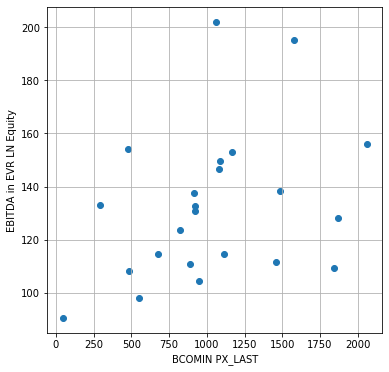


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
BHP LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.673378 |
| BCOMIN PX_LAST | 0.673378 |

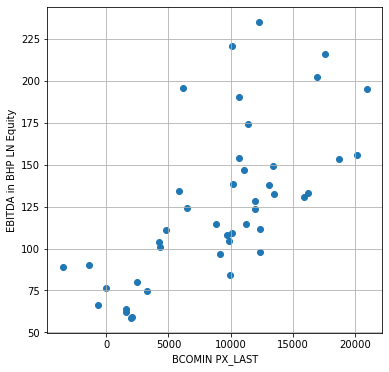


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-12-31
16   2008-06-30
17   2008-12-31
18   2009-06-30
19   2009-12-31
20   2010-06-30
21   2010-12-31
22   2011-06-30
23   2012-01-02
24   2012-07-02
25   2012-12-31
26   2013-07-01
27   2014-06-30
28   2014-12-31
29   2015-06-30
30   2015-12-31
31   2016-06-30
32   2017-01-02
33   2017-06-30
34   2018-01-01
35   2018-07-02
36   2018-12-31
37   2019-07-01
38   2019-12-31
39   2020-06-30
40   2020-12-31
41   2021-06-30
Name: Dates, dtype: datetime64[ns]
RIO LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.471248 |
| BCOMIN PX_LAST | 0.471248 |         1        |


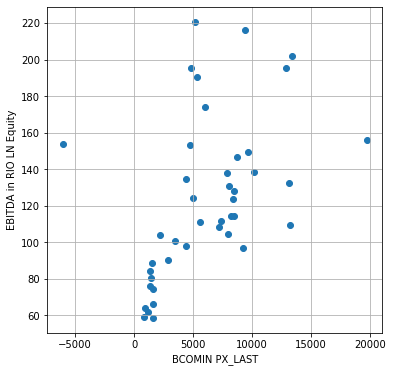


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
ANTO LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.819923 |
| BCOMIN PX_LAST | 0.819923 

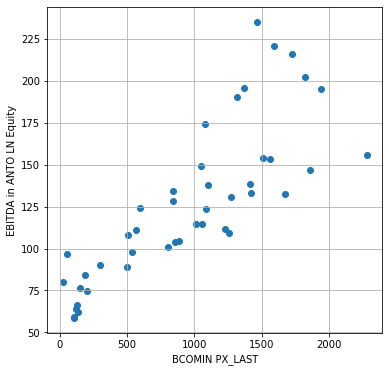


###################################################################

0    2007-07-02
1    2007-12-31
2    2008-06-30
3    2008-12-31
4    2009-06-30
5    2009-12-31
6    2010-06-30
7    2010-12-31
8    2011-06-30
9    2012-01-02
10   2012-07-02
11   2012-12-31
12   2013-07-01
13   2014-06-30
14   2014-12-31
15   2015-06-30
16   2015-12-31
17   2016-06-30
18   2017-01-02
19   2017-06-30
20   2018-01-01
21   2018-07-02
22   2018-12-31
23   2019-07-01
24   2019-12-31
25   2020-06-30
26   2020-12-31
27   2021-06-30
Name: Dates, dtype: datetime64[ns]
GLEN LN Equity

|                |    EBITDA |   BCOMIN PX_LAST |
|:---------------|----------:|-----------------:|
| EBITDA         |  1        |        -0.355397 |
| BCOMIN PX_LAST | -0.355397 |         1        |


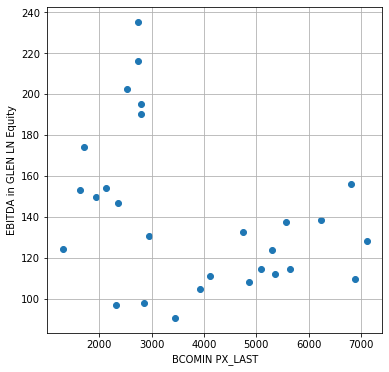


###################################################################

0    2000-01-04
1    2000-06-30
2    2001-01-01
3    2001-07-02
4    2001-12-31
5    2002-07-01
6    2002-12-31
7    2003-06-30
8    2003-12-31
9    2004-06-30
10   2004-12-31
11   2005-06-30
12   2006-01-02
13   2006-06-30
14   2007-01-01
15   2007-07-02
16   2007-12-31
17   2008-06-30
18   2008-12-31
19   2009-06-30
20   2009-12-31
21   2010-06-30
22   2010-12-31
23   2011-06-30
24   2012-01-02
25   2012-07-02
26   2012-12-31
27   2013-07-01
28   2013-12-31
29   2014-06-30
30   2014-12-31
31   2015-06-30
32   2015-12-31
33   2016-06-30
34   2017-01-02
35   2017-06-30
36   2018-01-01
37   2018-07-02
38   2018-12-31
39   2019-07-01
40   2019-12-31
41   2020-06-30
42   2020-12-31
43   2021-06-30
Name: Dates, dtype: datetime64[ns]
AAL LN Equity

|                |   EBITDA |   BCOMIN PX_LAST |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.508986 |
| BCOMIN PX_LAST | 0.508986 |

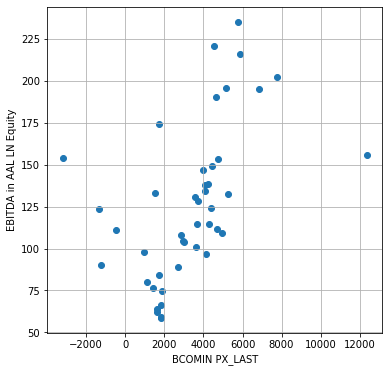


###################################################################



In [211]:
#Heavily inspired by DataExploration.ipynb
def find_closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)
    
def add_closest_to_EBITDA_date(ebitda_dataset, bcomin_dataset):
    ebitda_dataset['BCOMIN PX_LAST'] = np.nan
    for i in range(0, len(ebitda_dataset)):
        date = ebitda_dataset["Dates"][i]
        date_as_string = date.to_pydatetime()
        closest_date = find_closest_date(bcomin_dataset["Dates"], date, 0, len(bcomin_dataset))
        ebitda_dataset.loc[i, "BCOMIN PX_LAST"] =  bcomin_dataset['PX_LAST'][closest_date]
    
    ebitda_dataset['BCOMIN PX_LAST'] = ebitda_dataset['BCOMIN PX_LAST'].map(lambda x: float(x)) #Convert obj to float
    return ebitda_dataset

def scatterPlotBCOMIN_LastPXVsEBITDA(df, companyName):
    #PX_LAST as most commodity data I found contains only PX_LAST
    fig = plt.figure(figsize=(6,6))

    plt.scatter(df['EBITDA'], df['BCOMIN PX_LAST'])
    plt.xlabel('BCOMIN PX_LAST')
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()
    
for company in company_names:
    companies_ebitda = getEBITDAUnique(companies_financial_dataset,company)
    add_closest_to_EBITDA_date(companies_ebitda, BCOMIN_dataset)
    print(company + "\n")
    print(companies_ebitda.corr().to_markdown())
    scatterPlotBCOMIN_LastPXVsEBITDA(companies_ebitda, company)
    print("\n###################################################################\n")


# Specific Comodities

LMCADS03_LME_Comodity

In [223]:
#NOT ENOUGH DATA
#CL1_COMB_Comodity     = pd.read_csv('CL1_COMB_Comodity.csv'    , index_col=False) 
#LMCODY_LME_Comdty     = pd.read_csv('LMCODY LME Comdty.csv'    , index_col=False)

#NEED TO GET THESE DATASETS 
#LMAHDS03 Aluminium
#LMPBDS03 Lead
#LMSNDS03 Tin

LMCADS03_LME_Comodity = pd.read_csv('LMCADS03 LME Comodity.csv', index_col=False) #Copper
LMNIDS03_LME_Comdty   = pd.read_csv('LMNIDS03 LME Comdty.csv'  , index_col=False) #Nickel

         Dates  PX_LAST
0   2009-01-31   100.00
1   2009-02-28   100.61
2   2009-03-31   101.28
3   2009-04-30   102.72
4   2009-05-31   101.24
..         ...      ...
154 2021-11-30   412.47
155 2021-12-31   461.73
156 2022-01-31   624.49
157 2022-02-28   869.18
158 2022-03-31  1045.94

[159 rows x 2 columns]
EVR LN Equity

        Dates  EBITDA
0  2010-06-30  1089.0
1  2010-12-31  1062.0
2  2011-06-30  1580.0
3  2012-01-02  1164.0
4  2012-07-02  1079.0
5  2012-12-31   479.0
6  2013-07-01   922.0
7  2013-12-31   289.0
8  2014-06-30   912.0
9  2014-12-31   825.0
10 2015-06-30   885.0
11 2015-12-31    43.0
12 2016-06-30   548.0
13 2017-01-02   484.0
14 2017-06-30  1116.0
15 2018-01-01  1485.0
16 2018-07-02  1869.0
17 2018-12-31  1840.0
18 2019-07-01  1457.0
19 2019-12-31   679.0
20 2020-06-30   949.0
21 2020-12-31   919.0
22 2021-06-30  2061.0
|                       |   EBITDA |   Lithium Index PX_LAST |
|:----------------------|---------:|------------------------:|
| EBITDA           

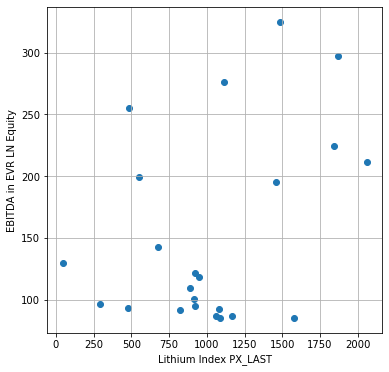


###################################################################

BHP LN Equity

        Dates  EBITDA
0  2000-01-04    2489
1  2000-06-30     -44
2  2001-01-01    3279
3  2001-07-02    -654
4  2001-12-31    1965
5  2002-07-01    1549
6  2002-12-31    2069
7  2003-06-30    1540
8  2003-12-31    9947
9  2004-06-30   -3530
10 2004-12-31    4203
11 2005-06-30    4321
12 2006-01-02    5821
13 2006-06-30    6176
14 2007-01-01   10114
15 2007-07-02   12320
16 2007-12-31   10649
17 2008-06-30   17572
18 2008-12-31    9177
19 2009-06-30    6497
20 2009-12-31   11438
21 2010-06-30   13448
22 2010-12-31   16943
23 2011-06-30   20974
24 2012-01-02   18724
25 2012-07-02   11056
26 2012-12-31   10671
27 2013-07-01   15920
28 2013-12-31   16240
29 2014-06-30   13094
30 2014-12-31   11996
31 2015-06-30    4798
32 2015-12-31   -1433
33 2016-06-30   12398
34 2017-01-02    9719
35 2017-06-30    8850
36 2018-01-01   10158
37 2018-07-02   11979
38 2018-12-31   10105
39 2019-07-01   12383
40 2019-12-31

KeyError: -1

In [270]:
LTBMPRIN_Index = pd.read_csv('LTBMPRIN Index.csv'       , index_col=False, names=["Dates", "PX_LAST"]) #Lithium
LTBMPRIN_Index.dropna(inplace=True)
LTBMPRIN_Index.reset_index(drop=True, inplace=True)
LTBMPRIN_Index["Dates"] = LTBMPRIN_Index["Dates"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
LTBMPRIN_Index = LTBMPRIN_Index.loc[::-1]
LTBMPRIN_Index.reset_index(drop=True, inplace=True)
print(LTBMPRIN_Index)


def find_closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)
    

def add_closest_to_EBITDA_date_comodity(ebitda_dataset, comodity_dataset, comodity_name):
    column_name = comodity_name + ' PX_LAST'
    ebitda_dataset[column_name] = np.nan
    i = 0
    for i in range(len(ebitda_dataset)):
        date = ebitda_dataset["Dates"][i]
        closest_date = find_closest_date(comodity_dataset["Dates"], date, 0, len(comodity_dataset["Dates"])-1)
        ebitda_dataset.loc[i, column_name] = comodity_dataset['PX_LAST'][closest_date]
    
    #ebitda_dataset['BCOMIN PX_LAST'] = ebitda_dataset['BCOMIN PX_LAST'].map(lambda x: float(x)) #Convert obj to float
    return ebitda_dataset

def scatterPlotCommodityLastPXVsEBITDA(df, companyName, comodity_name):
    #PX_LAST as most commodity data I found contains only PX_LAST
    column_name = comodity_name + ' PX_LAST'
    fig = plt.figure(figsize=(6,6))

    plt.scatter(df['EBITDA'], df[column_name])
    plt.xlabel(column_name)
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()
    
comodity_name = "Lithium Index"
for company in company_names:
    print(company + "\n")
    companies_ebitda_vs_comodity = getEBITDAUnique(companies_financial_dataset,company)
    print(companies_ebitda_vs_comodity)
    companies_ebitda_vs_comodity = add_closest_to_EBITDA_date_comodity(companies_ebitda_vs_comodity, LTBMPRIN_Index, comodity_name)
    print(companies_ebitda_vs_comodity.corr().to_markdown())
    scatterPlotCommodityLastPXVsEBITDA(companies_ebitda_vs_comodity, company, comodity_name)
    print("\n###################################################################\n")